In [124]:
# import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from pandas_profiling import ProfileReport
pd.options.display.max_columns = None

In [125]:
# read Boston data
dataset = ['marathon_results_2015.csv', 'marathon_results_2016.csv', 'marathon_results_2017.csv']
dfs = []
for i in range(0, len(dataset)):
    df = pd.read_csv(dataset[i], index_col=None, header=0)
    df['Year'] = int(''.join(filter(str.isdigit, dataset[i])))
    dfs.append(df)
dataframe = pd.concat(dfs, axis=0, sort=False, ignore_index=True)
dataframe = dataframe.rename(columns={'Unnamed: 0': 'ID', 'Gender': 'GRank', 'M/F': 'Gender'})
del dataframe['Unnamed: 8']

In [126]:
# convert string timeseries into floats (minutes)
dataframe['5K'] = pd.to_timedelta(pd.Series(dataframe['5K'])) / pd.offsets.Minute(1)
dataframe['10K'] = pd.to_timedelta(pd.Series(dataframe['10K'])) / pd.offsets.Minute(1)
dataframe['15K'] = pd.to_timedelta(pd.Series(dataframe['15K'])) / pd.offsets.Minute(1)
dataframe['20K'] = pd.to_timedelta(pd.Series(dataframe['20K'])) / pd.offsets.Minute(1)
dataframe['Half'] = pd.to_timedelta(pd.Series(dataframe['Half'])) / pd.offsets.Minute(1)
dataframe['25K'] = pd.to_timedelta(pd.Series(dataframe['25K'])) / pd.offsets.Minute(1)
dataframe['30K'] = pd.to_timedelta(pd.Series(dataframe['30K'])) / pd.offsets.Minute(1)
dataframe['35K'] = pd.to_timedelta(pd.Series(dataframe['35K'])) / pd.offsets.Minute(1)
dataframe['40K'] = pd.to_timedelta(pd.Series(dataframe['40K'])) / pd.offsets.Minute(1)
dataframe['Pace'] = pd.to_timedelta(pd.Series(dataframe['Pace'])) / pd.offsets.Minute(1)
dataframe['Official Time'] = pd.to_timedelta(pd.Series(dataframe['Official Time'])) / pd.offsets.Minute(1)

In [127]:
'''# Summarize dataset
dataframe.head()
dataframe.describe()
# create profile
profile = ProfileReport(dataframe)
# save the report
profile.to_file('boston_profile.html')'''

"# Summarize dataset\ndataframe.head()\ndataframe.describe()\n# create profile\nprofile = ProfileReport(dataframe)\n# save the report\nprofile.to_file('boston_profile.html')"

Year 2015: 
Variables Half2 and Gender are dependent (reject H0)
2nd half males: mean =   101.4974; median =    96.0917
2nd half females: mean =   111.5295; median =   106.5167


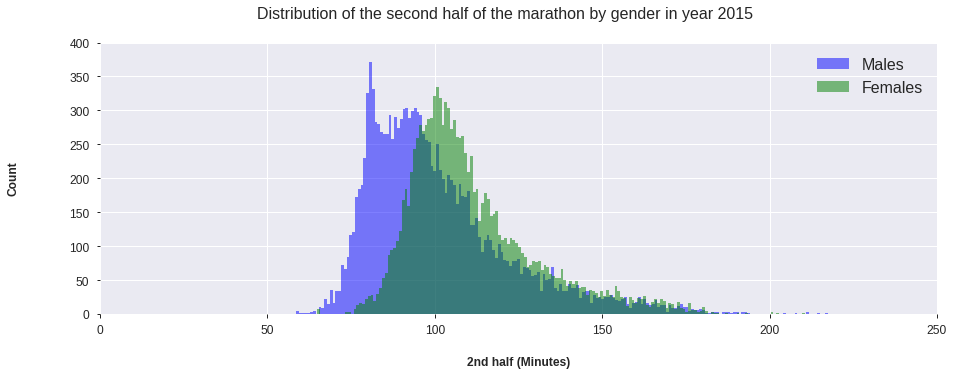

Year 2016: 
Variables Half2 and Gender are dependent (reject H0)
2nd half males: mean =   108.9415; median =   103.8833
2nd half females: mean =   116.7792; median =   111.6333


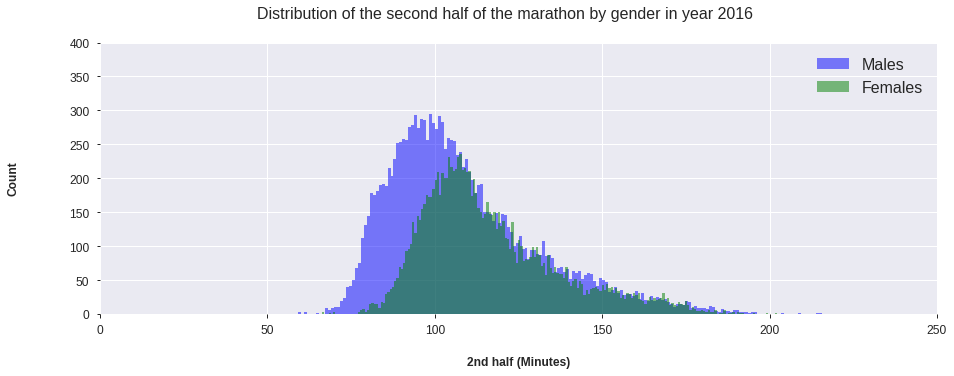

Year 2017: 
Variables Half2 and Gender are dependent (reject H0)
2nd half males: mean =   110.5827; median =   106.0333
2nd half females: mean =   118.7950; median =   114.5167


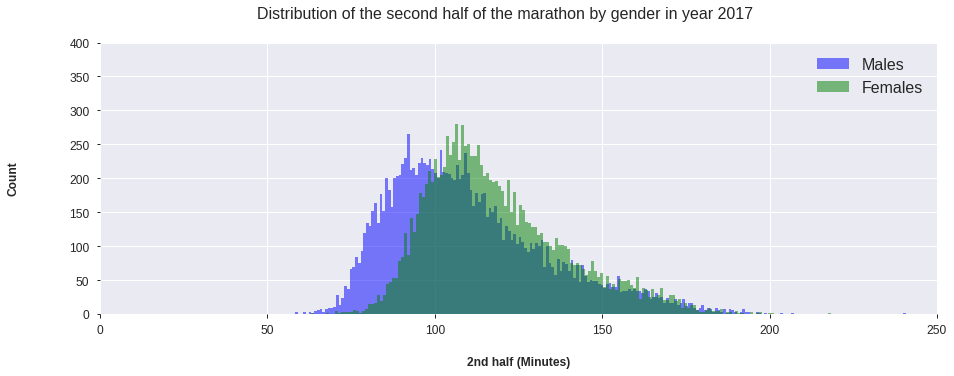

In [128]:
# Assumption 1a: female runners have a better 2nd half  than male runners
dataframe['Half2'] = dataframe['40K'] - dataframe['Half']
for year in dataframe.Year.unique():
    print('Year {0:d}: '.format(year))
    # We are interested in those who manage to reach the finish
    dataframe_finished = dataframe[dataframe.Half2 > 0]
    half2_male = dataframe_finished['Half2'][dataframe.Year == year][dataframe.Gender == 'M']
    half2_female = dataframe_finished['Half2'][dataframe.Year == year][dataframe.Gender == 'F']
    t, p = stats.ttest_ind(half2_male,half2_female)
    alpha = 0.05
    if p <= alpha:
        print('Variables Half2 and Gender are dependent (reject H0)')
    else:
        print('Variables Half2 and Gender are independent (fail to reject H0)')
    # estimate means
    print('2nd half males: mean = {:10.4f}; median = {:10.4f}'.format(half2_male.mean(), half2_male.median()))
    print('2nd half females: mean = {:10.4f}; median = {:10.4f}'.format(half2_female.mean(), half2_female.median()))
    # plot histograms
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.hist(half2_male, bins=300, alpha=0.5, color='blue', label='Males')
    ax.hist(half2_female, bins=300, alpha=0.5, color='green', label='Females')
    # Set axis labels
    ax.set_xlabel("2nd half (Minutes)", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("Count", labelpad=50, weight='bold', size=12)
    # Format y-axis label
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    plt.tick_params(axis='x', rotation=0, labelsize=12)
    plt.tick_params(axis='y', rotation=0, labelsize=12)
    plt.axis([0, 250, 0, 400])
    plt.legend(prop={'size': 16})
    plt.suptitle("Distribution of the second half of the marathon by gender in year {0:d}".format(year), fontsize=16)
    plt.show()

Year 2015: 
Variables last10K and Gender are dependent (reject H0)
last 10K males: mean =    55.3163; median =    52.0667
last 10K females: mean =    60.1310; median =    57.2333


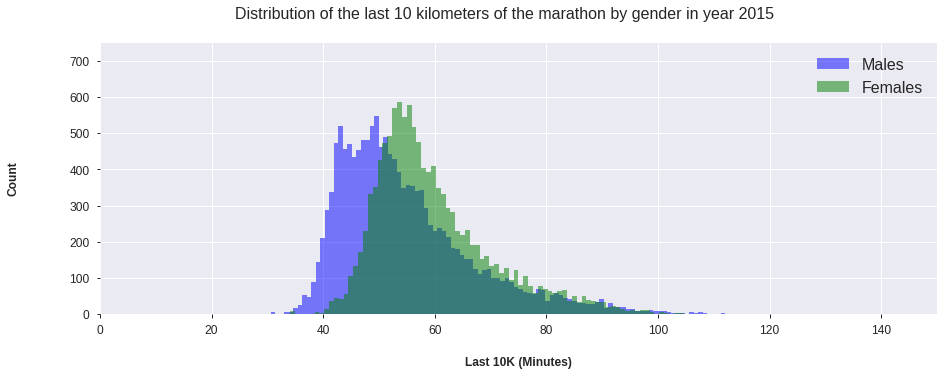

Year 2016: 
Variables last10K and Gender are dependent (reject H0)
last 10K males: mean =    59.9607; median =    57.1000
last 10K females: mean =    63.1722; median =    60.3000


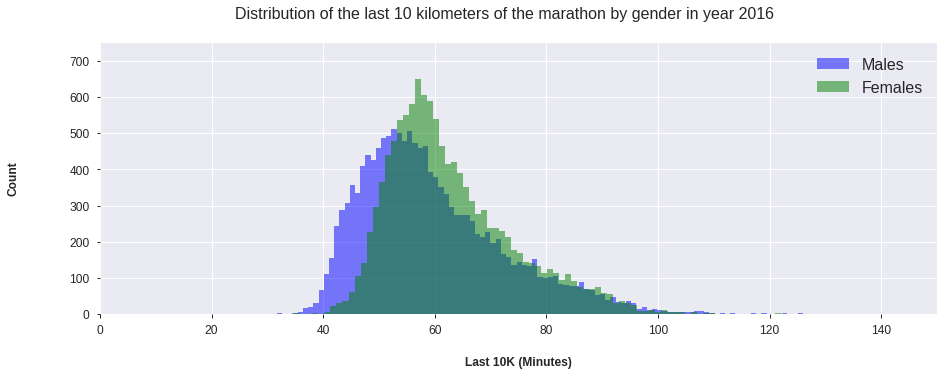

Year 2017: 
Variables last10K and Gender are dependent (reject H0)
last 10K males: mean =    60.9399; median =    58.5000
last 10K females: mean =    64.0849; median =    61.6333


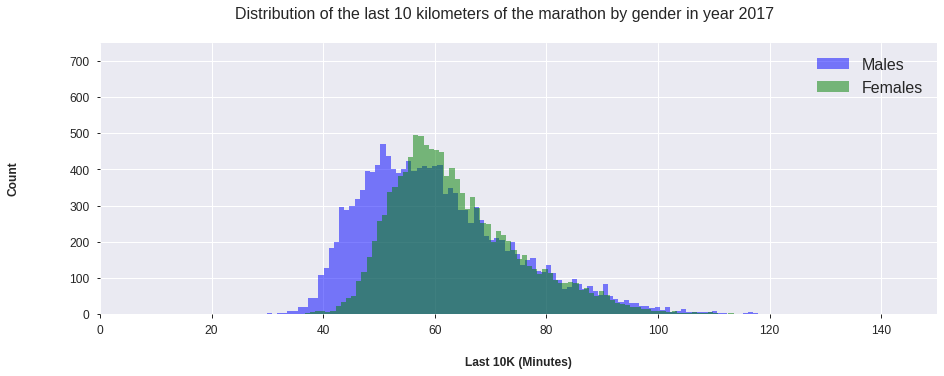

In [129]:
# Assumption 1b: female runners have a better last 10k than male runners
dataframe['last10K'] = dataframe['40K'] - dataframe['30K']
for year in dataframe.Year.unique():
    print('Year {0:d}: '.format(year))
    # We are interested in those who manage to reach the finish
    dataframe_finished = dataframe[dataframe.last10K > 0]
    last10K_male = dataframe_finished['last10K'][dataframe.Year == year][dataframe.Gender == 'M']
    last10K_female = dataframe_finished['last10K'][dataframe.Year == year][dataframe.Gender == 'F']
    t, p = stats.ttest_ind(last10K_male,last10K_female)
    alpha = 0.05
    if p <= alpha:
        print('Variables last10K and Gender are dependent (reject H0)')
    else:
        print('Variables last10K and Gender are independent (fail to reject H0)')
    # estimate means
    print('last 10K males: mean = {:10.4f}; median = {:10.4f}'.format(last10K_male.mean(), last10K_male.median()))
    print('last 10K females: mean = {:10.4f}; median = {:10.4f}'.format(last10K_female.mean(), last10K_female.median()))
    # plot histograms
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.hist(last10K_male, bins=300, alpha=0.5, color='blue', label='Males')
    ax.hist(last10K_female, bins=300, alpha=0.5, color='green', label='Females')
    # Set axis labels
    ax.set_xlabel("Last 10K (Minutes)", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("Count", labelpad=50, weight='bold', size=12)
    # Format y-axis label
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    plt.tick_params(axis='x', rotation=0, labelsize=12)
    plt.tick_params(axis='y', rotation=0, labelsize=12)
    plt.axis([0, 150, 0, 750])
    plt.legend(prop={'size': 16})
    plt.suptitle("Distribution of the last 10 kilometers of the marathon by gender in year {0:d}".format(year), fontsize=16)
    plt.show()

Year 2015: 
Variables Half and Gender are dependent (reject H0)
1st half males: mean =   102.9791; median =    99.3500
1st half females: mean =   114.0374; median =   110.5667


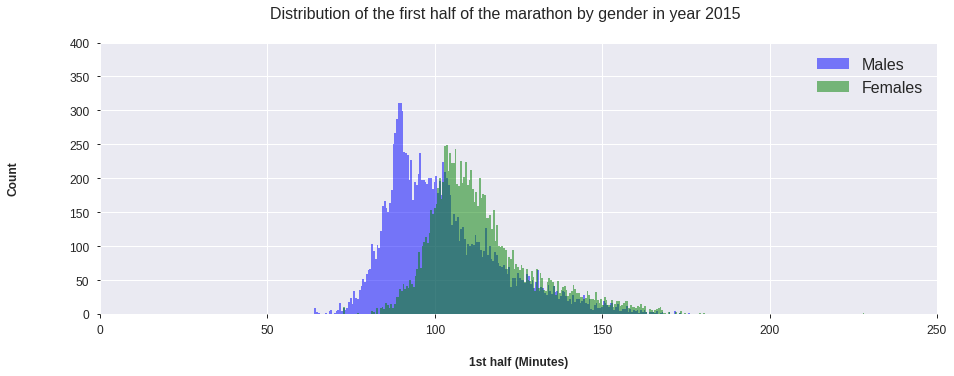

Year 2016: 
Variables Half and Gender are dependent (reject H0)
1st half males: mean =   104.1298; median =   100.6500
1st half females: mean =   115.8716; median =   112.3167


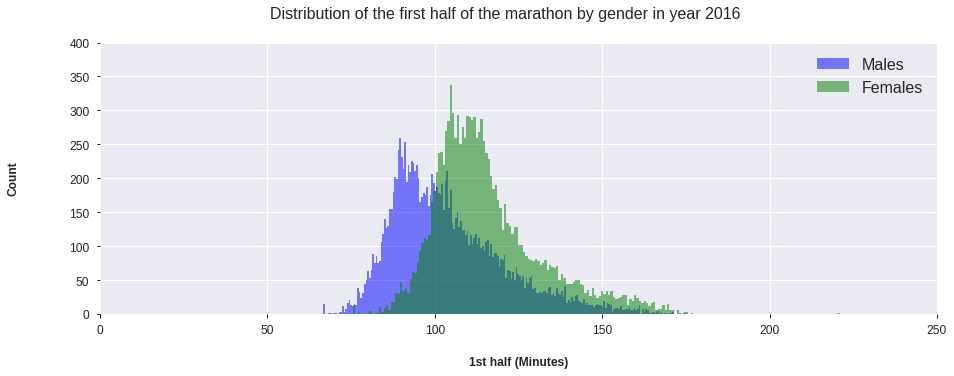

Year 2017: 
Variables Half and Gender are dependent (reject H0)
1st half males: mean =   105.2185; median =   101.7667
1st half females: mean =   116.8728; median =   113.3167


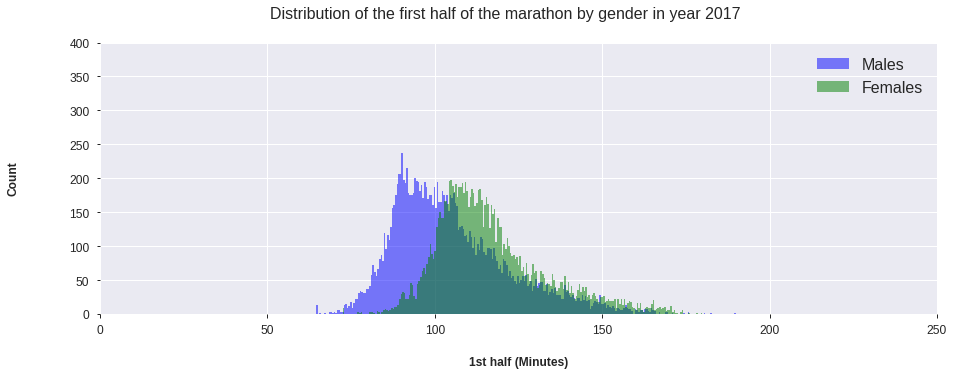

In [130]:
# Assumption 2: male runners have a faster 1st half than female runners
for year in dataframe.Year.unique():
    print('Year {0:d}: '.format(year))
    # We are interested in those who manage to reach the finish
    dataframe_finished = dataframe[dataframe.Half > 0]
    half_male = dataframe_finished['Half'][dataframe.Year == year][dataframe.Gender == 'M']
    half_female = dataframe_finished['Half'][dataframe.Year == year][dataframe.Gender == 'F']
    t, p = stats.ttest_ind(half_male,half_female)
    alpha = 0.05
    if p <= alpha:
        print('Variables Half and Gender are dependent (reject H0)')
    else:
        print('Variables Half and Gender are independent (fail to reject H0)')
    # estimate means
    print('1st half males: mean = {:10.4f}; median = {:10.4f}'.format(half_male.mean(), half_male.median()))
    print('1st half females: mean = {:10.4f}; median = {:10.4f}'.format(half_female.mean(), half_female.median()))
    # plot histograms
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.hist(half_male, bins=300, alpha=0.5, color='blue', label='Males')
    ax.hist(half_female, bins=300, alpha=0.5, color='green', label='Females')
    # Set axis labels
    ax.set_xlabel("1st half (Minutes)", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("Count", labelpad=50, weight='bold', size=12)
    # Format y-axis label
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    plt.tick_params(axis='x', rotation=0, labelsize=12)
    plt.tick_params(axis='y', rotation=0, labelsize=12)
    plt.axis([0, 250, 0, 400])
    plt.legend(prop={'size': 16})
    plt.suptitle("Distribution of the first half of the marathon by gender in year {0:d}".format(year), fontsize=16)
    plt.show()

Year 2015: 
Variables Pace and Local are dependent (reject H0)
Pace Locals: mean =     9.5528; median =     9.4500
Pace non-Locals: mean =     8.5854; median =     8.3500


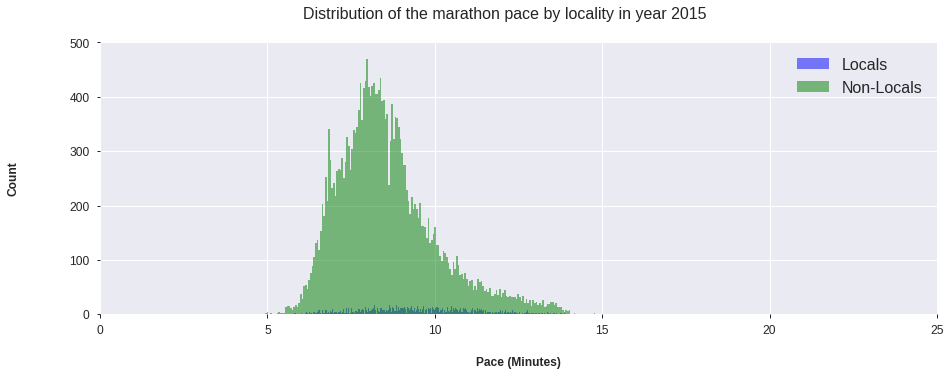

Year 2016: 
Variables Pace and Local are dependent (reject H0)
Pace Locals: mean =     9.9371; median =     9.8333
Pace non-Locals: mean =     8.9106; median =     8.6667


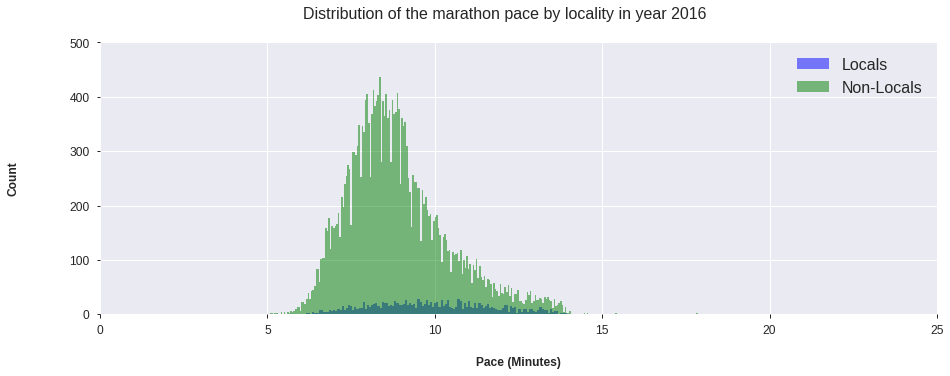

Year 2017: 
Variables Pace and Local are dependent (reject H0)
Pace Locals: mean =     9.9460; median =     9.9667
Pace non-Locals: mean =     9.0308; median =     8.8000


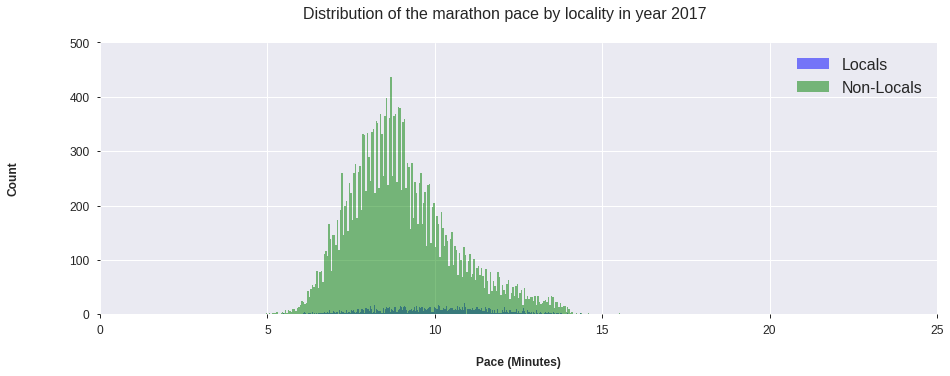

In [131]:
# Assumption 5: local runners (from Boston or close) have a more stable run than non locals
Neighbours = ["Boston", "Winthrop", "Revere", "Chelsea", "Everett", "Somerville", "Cambridge", "Watertown", "Newton", "Brookline", "Needham", "Dedham", "Canton", "Milton", "Quincy"]

for year in dataframe.Year.unique():
    print('Year {0:d}: '.format(year))
    local = dataframe['Pace'][dataframe.Year == year][dataframe.City.isin(Neighbours)]
    nolocal = dataframe['Pace'][dataframe.Year == year][~dataframe.City.isin(Neighbours)]
    t, p = stats.ttest_ind(local,nolocal)
    alpha = 0.05
    if p <= alpha:
        print('Variables Pace and Local are dependent (reject H0)')
    else:
        print('Variables Pace and Local are independent (fail to reject H0)')
    # estimate means
    print('Pace Locals: mean = {:10.4f}; median = {:10.4f}'.format(local.mean(), local.median()))
    print('Pace non-Locals: mean = {:10.4f}; median = {:10.4f}'.format(nolocal.mean(), nolocal.median()))
    # plot histograms
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.hist(local, bins=300, alpha=0.5, color='blue', label='Locals')
    ax.hist(nolocal, bins=300, alpha=0.5, color='green', label='Non-Locals')
    # Set axis labels
    ax.set_xlabel("Pace (Minutes)", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("Count", labelpad=50, weight='bold', size=12)
    # Format y-axis label
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    plt.tick_params(axis='x', rotation=0, labelsize=12)
    plt.tick_params(axis='y', rotation=0, labelsize=12)
    plt.axis([0, 25, 0, 500])
    plt.legend(prop={'size': 16})
    plt.suptitle("Distribution of the marathon pace by locality in year {0:d}".format(year), fontsize=16)
    plt.show()

Year 2015: 
Variables Pace and Return are dependent (reject H0)
Pace Return: mean =     8.3689; median =     8.1500
Pace Non-Return: mean =     8.7473; median =     8.4833


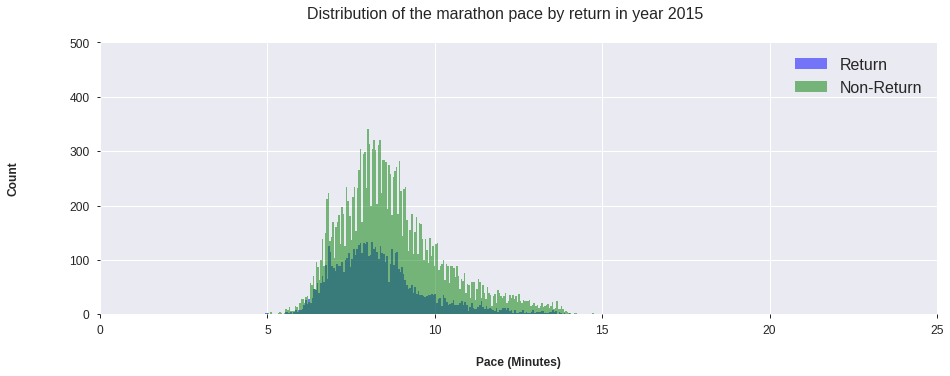

Year 2016: 
Variables Pace and Return are dependent (reject H0)
Pace Return: mean =     8.7302; median =     8.4667
Pace Non-Return: mean =     9.0830; median =     8.8167


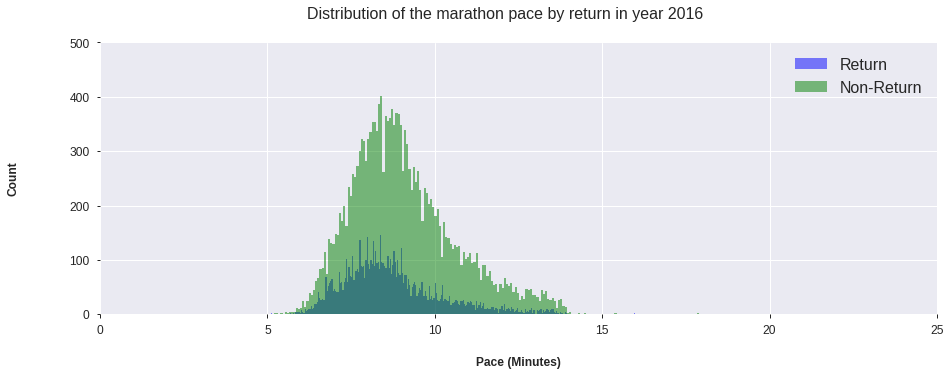

Year 2017: 
Variables Pace and Return are dependent (reject H0)
Pace Return: mean =     8.9118; median =     8.6500
Pace Non-Return: mean =     9.1473; median =     8.9000


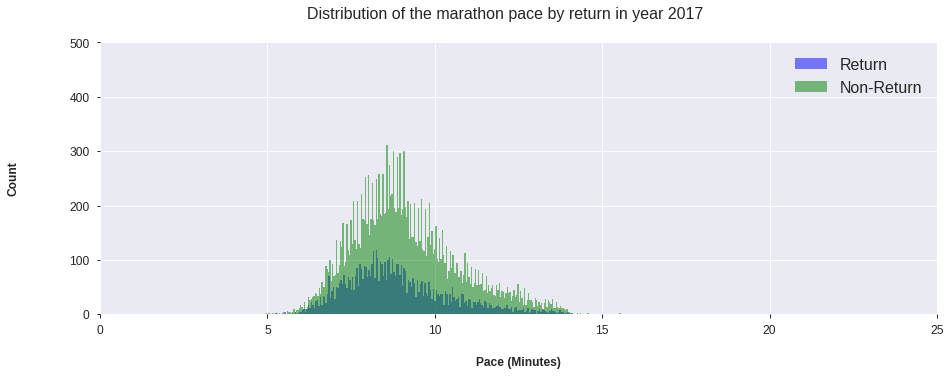

In [132]:
# Assumption 6: runners who return do better (more stable and maybe faster, lower suffer score)
Returns = dataframe[dataframe.Name.duplicated()]['Name'].tolist()

for year in dataframe.Year.unique():
    print('Year {0:d}: '.format(year))
    ret = dataframe['Pace'][dataframe.Year == year][dataframe.Name.isin(Returns)]
    nonret = dataframe['Pace'][dataframe.Year == year][~dataframe.Name.isin(Returns)]
    t, p = stats.ttest_ind(ret,nonret)
    alpha = 0.05
    if p <= alpha:
        print('Variables Pace and Return are dependent (reject H0)')
    else:
        print('Variables Pace and Return are independent (fail to reject H0)')
    # estimate means
    print('Pace Return: mean = {:10.4f}; median = {:10.4f}'.format(ret.mean(), ret.median()))
    print('Pace Non-Return: mean = {:10.4f}; median = {:10.4f}'.format(nonret.mean(), nonret.median()))
    # plot histograms
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.hist(ret, bins=300, alpha=0.5, color='blue', label='Return')
    ax.hist(nonret, bins=300, alpha=0.5, color='green', label='Non-Return')
    # Set axis labels
    ax.set_xlabel("Pace (Minutes)", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("Count", labelpad=50, weight='bold', size=12)
    # Format y-axis label
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    plt.tick_params(axis='x', rotation=0, labelsize=12)
    plt.tick_params(axis='y', rotation=0, labelsize=12)
    plt.axis([0, 25, 0, 500])
    plt.legend(prop={'size': 16})
    plt.suptitle("Distribution of the marathon pace by return in year {0:d}".format(year), fontsize=16)
    plt.show()

In [133]:
# read Weather data
dataset = 'weather_data_boston.csv'
weather = pd.read_csv(dataset, header=0)
weather.head()

,Unnamed: 0,STATION,DATE,HourlyWetBulbTemperature,HourlyRelativeHumidity,HourlyDryBulbTemperature
0,0,72509014739,2015-01-01T00:54:00,18.0,50.0,22
1,1,72509014739,2015-01-01T01:00:00,18.0,50.0,22
2,2,72509014739,2015-01-01T01:54:00,18.0,50.0,22
3,3,72509014739,2015-01-01T02:54:00,18.0,50.0,22
4,4,72509014739,2015-01-01T03:54:00,19.0,46.0,24


In [134]:
# Assumption 3: higher levels of humidity / temperature have a negative impact in A1 and A2
# take a sample of returning runners and test average humidity levels on them
Events = ['2015-04-20T10:00:00', '2016-04-18T10:00:00', '2017-04-17T10:00:00']
returns = dataframe[dataframe.Name.isin(Returns)]
returns_A1 = returns['5K']
returns_A2 = returns['10K']
# for event in Events:
#     dt = weather.iloc[(df['DATE']-event).abs().argsort()[:2]] # TODO: convert to floats and get minmax mean